In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import sklearn
import numpy as np

titanic_train = pd.read_csv("./titanic_dataset/train.csv")
titanic_test = pd.read_csv("./titanic_dataset/test.csv")
titanic_gender= pd.read_csv("./titanic_dataset/gender_submission.csv")

In [56]:
titanic_train["Age"] = pd.cut(titanic_train["Age"], 
                                  bins = [0., 5., 10., 15., 20., 25., 30., 35., 
                                          40., 45., 50., 55., 60., 65., 70., np.inf],
                                  labels=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

titanic_train["Fare"] = pd.cut(titanic_train["Fare"], 
                                  bins = [0., 10., 20., 30., 40, 50., 60., 70., 80., 90., 100., 200., np.inf],
                                  labels=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 250])

titanic_train.loc[titanic_train["Sex"] == "male", "Sex"] = 1
titanic_train.loc[titanic_train["Sex"] == "female", "Sex"] = 0

titanic_train.loc[titanic_train["Embarked"]=="S", "Embarked"] = 0
titanic_train.loc[titanic_train["Embarked"]=="C", "Embarked"] = 1
titanic_train.loc[titanic_train["Embarked"]=="Q", "Embarked"] = 2

titanic_train.drop(columns = ["Name", "Ticket", "Cabin"], inplace=True)
titanic_train["Sex"] = titanic_train["Sex"].astype("int64")



ValueError: cannot convert float NaN to integer

In [69]:
pd.isna(titanic_train['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [91]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
titanic_train['Age'] = imputer.fit_transform(titanic_train['Age'].values.reshape(-1, 1))
titanic_train['Fare'] = imputer.fit_transform(titanic_train['Fare'].values.reshape(-1, 1))
titanic_train['Embarked'] = imputer.fit_transform(titanic_train['Embarked'].values.reshape(-1, 1))
titanic_train[['Age', 'Fare', 'Embarked']] = titanic_train[['Age', 'Fare', 'Embarked']].astype("int64")

In [92]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int64
 8   Embarked     891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


TypeError: '<' not supported between instances of 'str' and 'int'

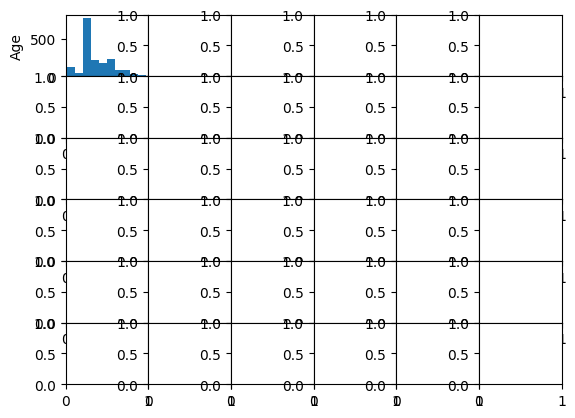

In [83]:
from pandas.plotting import scatter_matrix

scatter_matrix(titanic_train[['Age', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])